# **_Time Series Prediction ([Concept](https://www.sciencedirect.com/science/article/abs/pii/S1568494622000217))_**
### __*Interpretable cognitive learning with spatial attention for high-volatility time series prediction*__

<br>

### __*Import Libraries*__

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import math

warnings.filterwarnings("ignore")

<br>

### __*Preparation of the [Google Stock Price](https://www.kaggle.com/datasets/e7c33ac54ade05be32a190e20c1dc176f268acbd28c22d28900e96112383b18e) Data*__

In [2]:
# Show structure of dataset
goog_raw = pd.read_csv('data/GOOG.csv')
goog_raw.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [3]:
# Import the required libraries
from pyFTS.models import hofts
from pyFTS.partitioners import Grid

# Load the dataset
data = goog_raw['close']

# Set the number of lags for the model
num_lags = 5

# Split the dataset into training and testing sets
train_data = data.iloc[:1020]
test_data = data.iloc[1020:]

# Define the partitioner
part = Grid.GridPartitioner(data=train_data, npart=200)

# Create the high order FTS model
model = hofts.HighOrderFTS(data=train_data.values, partitioner=part, order=num_lags)

# Train the model
model.fit(train_data.values)

# Use the model to predict the test data
forecast = model.predict(test_data.values)

# Truncate the test data to match the length of the predicted data
test_data_truncated = test_data.iloc[num_lags-1:-1]

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(test_data_truncated.values, forecast))

# Calculate the MAPE
mape = (abs((test_data_truncated.values - forecast) / test_data_truncated.values)).mean() * 100

# Print the error metrics
print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 354.0968065621593
MAPE: 10.839991028053959


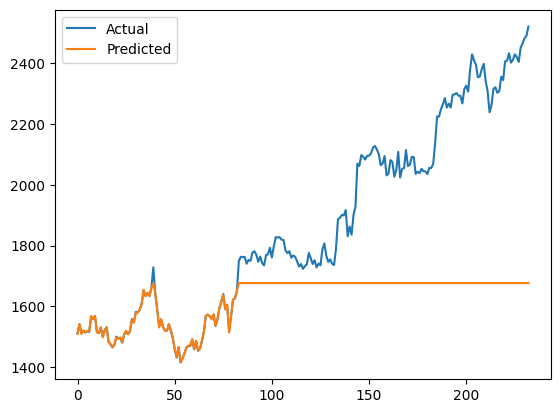

In [4]:
# Plot the actual vs predicted data
plt.plot(test_data_truncated.values, label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend()
plt.show()

In [5]:
from pyFTS.data import Enrollments

# Load the dataset
data = pd.read_csv('data/GOOG.csv')
data = data['close']

train_data = data.iloc[:1000].to_numpy()
test_data = data.iloc[1000:].to_numpy()

from pyFTS.partitioners import Grid, Entropy, Util as pUtil
fs = Grid.GridPartitioner(data=train_data, npart=200)

from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(train_data)
forecasts = model.predict(test_data)

# Truncate the test data to match the length of the predicted data
test_data_truncated = test_data

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(test_data_truncated, forecasts))

# Calculate the MAPE
mape = (abs((test_data_truncated - forecasts) / test_data_truncated)).mean() * 100

# Print the error metrics
print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 338.87230868485597
MAPE: 9.99877365019186


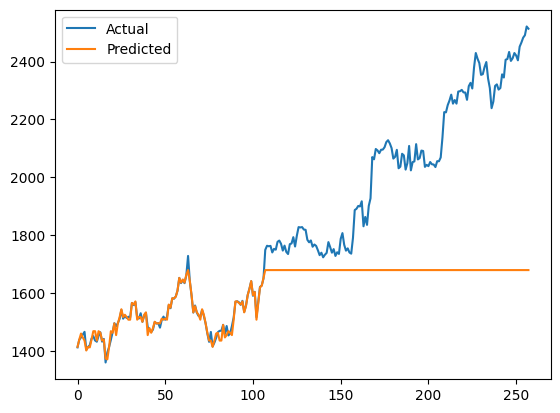

In [6]:
# Plot the actual vs predicted data
plt.plot(test_data_truncated, label='Actual')
plt.plot(forecasts, label='Predicted')
plt.legend()
plt.show()

<br>

### __*Preparation of the [Weather](https://www.kaggle.com/datasets/ananthr1/weather-prediction) Data*__

In [7]:
# Show structure of dataset
weather_raw = pd.read_csv('data/seattle-weather.csv')
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [8]:
# Import the required libraries
from pyFTS.models import hofts
from pyFTS.partitioners import Grid

# Load the dataset
data = weather_raw['temp_max']

# Set the number of lags for the model
num_lags = 5

# Split the dataset into training and testing sets
train_data = data.iloc[:1200].to_numpy()
test_data = data.iloc[1200:].to_numpy()

# Define the partitioner
part = Grid.GridPartitioner(data=train_data, npart=200)

# Create the high order FTS model
model = hofts.HighOrderFTS(data=train_data, partitioner=part, order=num_lags)

# Train the model
model.fit(train_data)

# Use the model to predict the test data
forecast = model.predict(test_data)

# Truncate the test data to match the length of the predicted data
test_data_truncated = test_data[num_lags-1:-1]

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(test_data_truncated, forecast))

# Calculate the MAPE
test_data_truncated_mape = list(test_data_truncated)
forecast_mape = list(forecast)

for idx in range(len(test_data_truncated)):
    if test_data_truncated[idx] == 0:
        test_data_truncated_mape[idx] = 1
        forecast_mape[idx] = 1

test_data_truncated_mape = np.array(test_data_truncated_mape)
forecast_mape = np.array(forecast_mape)

mape = (abs((test_data_truncated_mape - forecast_mape) / test_data_truncated_mape)).mean() * 100

# Print the error metrics
print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 0.05747892659466279
MAPE: 0.3410940367006306


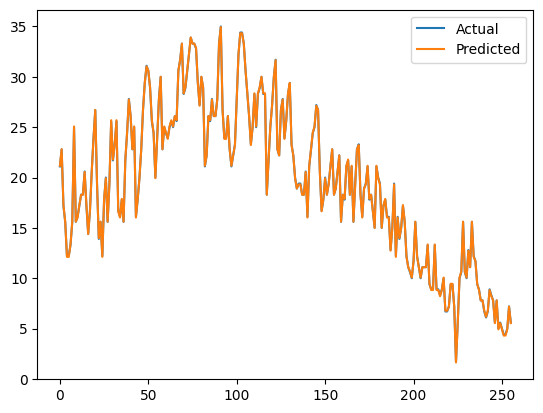

In [9]:
# Plot the actual vs predicted data
plt.plot(test_data_truncated, label='Actual')
plt.plot(forecast, label='Predicted')
plt.legend()
plt.show()

In [10]:
from pyFTS.data import Enrollments

# Load the dataset
data = weather_raw['temp_min']

train_data = data.iloc[:1200].to_numpy()
test_data = data.iloc[1200:].to_numpy()

from pyFTS.partitioners import Grid, Entropy, Util as pUtil
fs = Grid.GridPartitioner(data=train_data, npart=200)

from pyFTS.models import chen
model = chen.ConventionalFTS(partitioner=fs)
model.fit(train_data)
forecasts = np.array(model.predict(test_data))

# Truncate the test data to match the length of the predicted data
test_data_truncated = test_data

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(test_data_truncated, forecasts))

# Calculate the MAPE
test_data_truncated_mape = list(test_data_truncated)
forecast_mape = list(forecasts)
for idx in range(len(test_data_truncated)):
    if test_data_truncated[idx] == 0:
        test_data_truncated_mape[idx] = 1
        forecast_mape[idx] = 1

test_data_truncated_mape = np.array(test_data_truncated_mape)
forecast_mape = np.array(forecast_mape)

mape = (abs((test_data_truncated_mape - forecast_mape) / test_data_truncated_mape)).mean() * 100

# Print the error metrics
print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 0.6677299684706841
MAPE: 9.523308169128136


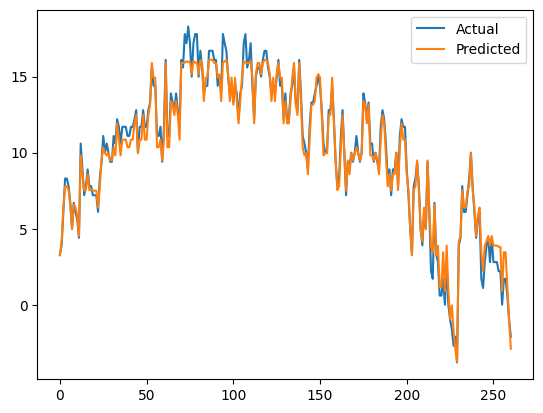

In [11]:
# Plot the actual vs predicted data
plt.plot(test_data_truncated, label='Actual')
plt.plot(forecasts, label='Predicted')
plt.legend()
plt.show()